In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from yellowbrick.cluster import SilhouetteVisualizer

## Preprocessing 1 ##

In [99]:
# format columns and add computed columns
def preprocess(data):
    data["Energy_kcal"] = data["Energy_kcal"].round() # should be int and most values actually are int
    data["Magnesium_mg"] = pd.to_numeric(data["Magnesium_mg"], errors="coerce")
    data["VitE_mg"] = pd.to_numeric(data["VitE_mg"], errors="coerce")
    data["contains_B12"] = data["VitB12_mcg"] != 0.0

def plot_graphs(data):
    data.describe()
    sns.pairplot(data, vars=["Energy_kcal", "Protein_g", "Saturated_fats_g"], hue="contains_B12")
    sns.pairplot(data, vars=["Fat_g", "Carb_g", "Fiber_g"], hue="contains_B12")
    sns.pairplot(data, vars=["Calcium_mg", "Iron_mg", "Magnesium_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Phosphorus_mg", "Potassium_mg", "Sodium_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Zinc_mg", "Copper_mcg", "Manganese_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Selenium_mcg", "VitC_mg", "Thiamin_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Riboflavin_mg", "Niacin_mg", "Folate_mcg"], hue="contains_B12")
    sns.pairplot(data, vars=["VitB6_mg", "VitA_mcg", "VitE_mg", "VitD2_mcg"], hue="contains_B12")

data = pd.read_csv("ingredients.csv", keep_default_na=True)
data["id"] = data.index
non_test_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(non_test_data, test_size=0.25, random_state=42)
train_data = pd.DataFrame(train_data)
train_features = train_data.drop(columns=["id", "Descrip"])
train_metadata = train_data["Descrip"]
preprocess(train_features)

pipe_prepro = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy="median"),
    StandardScaler()
)
train_features = pd.DataFrame(pipe_prepro.fit_transform(train_features), columns=train_features.columns)
pipe_factor = make_pipeline(LocalOutlierFactor(n_neighbors = 30))
label = pipe_factor.fit_predict(train_features)
train_features = train_features[label == 1].reset_index(drop=True)
train_data = train_data[label == 1].reset_index(drop=True)


## Exploration analysis ##

Plot some corelations.

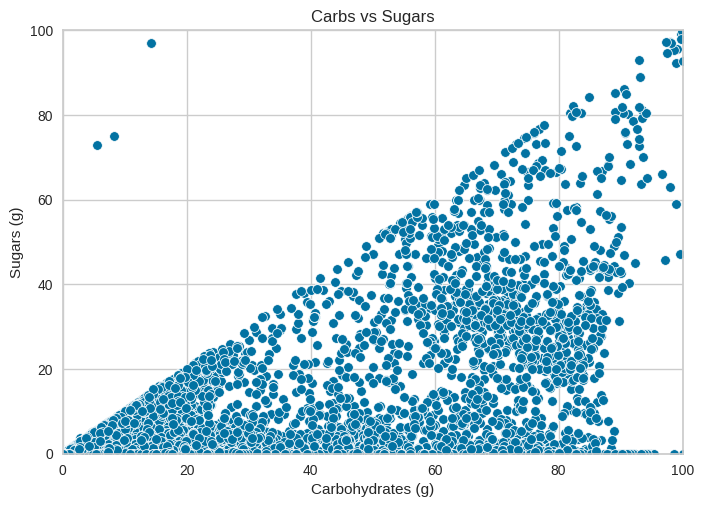

0.5831649828010718


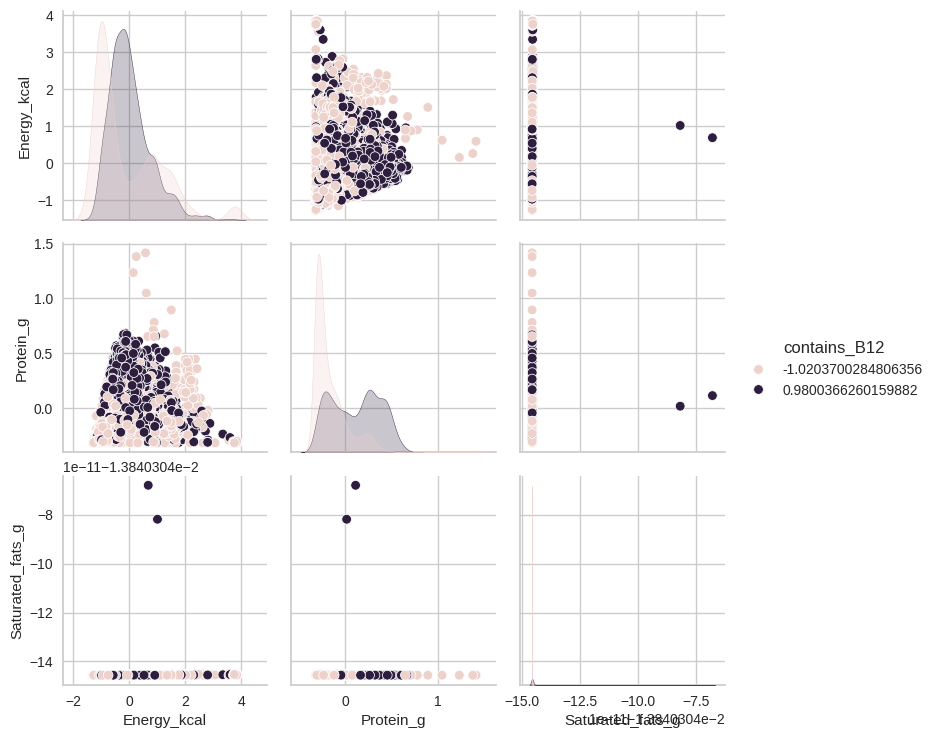

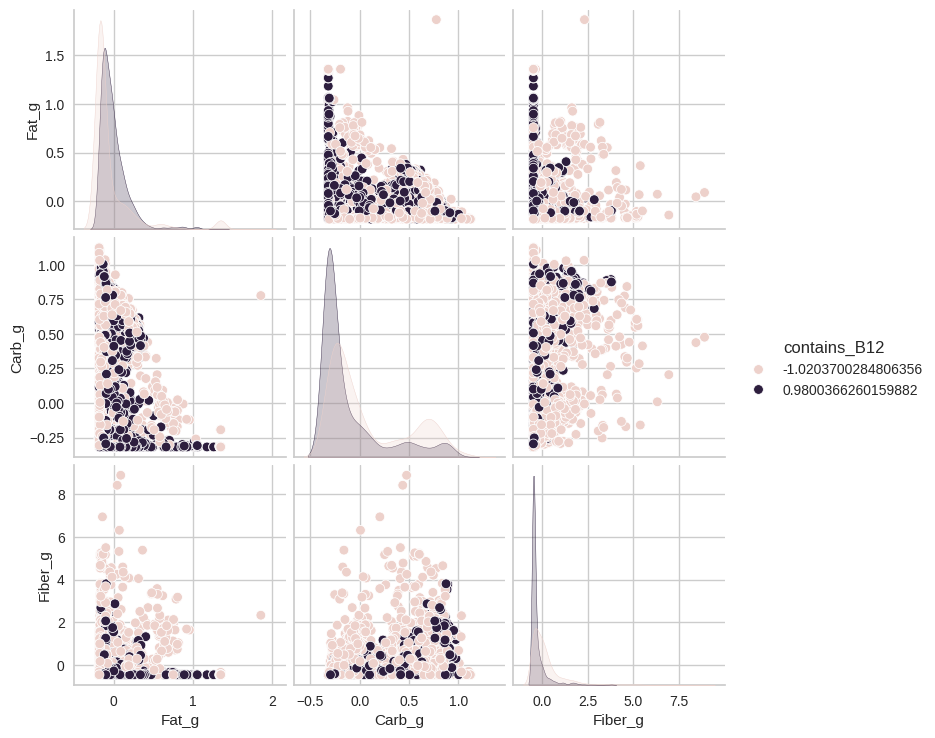

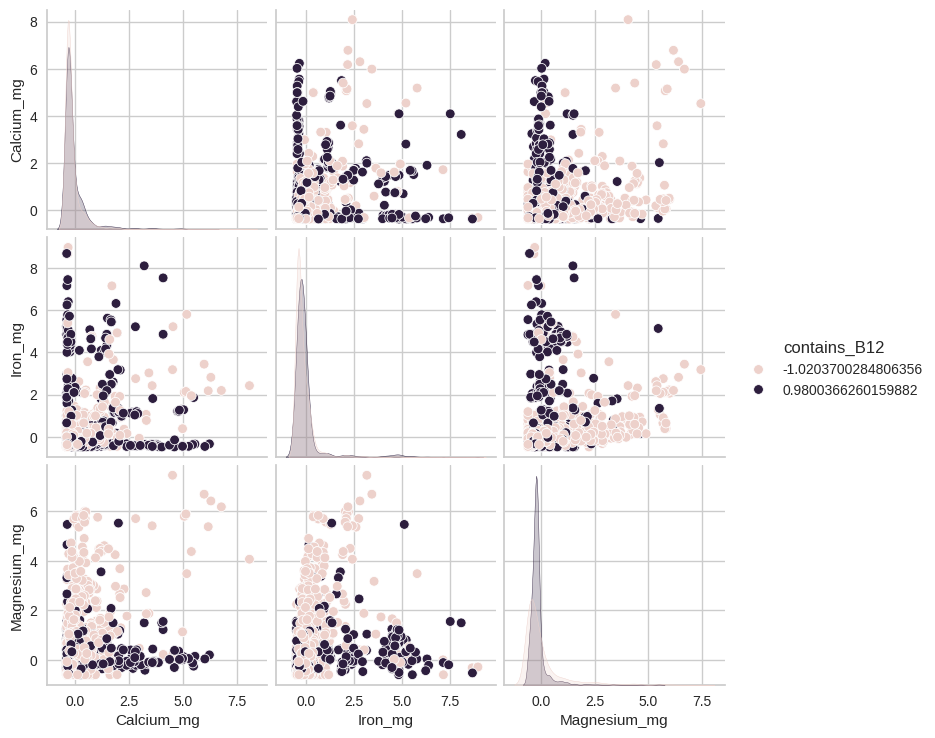

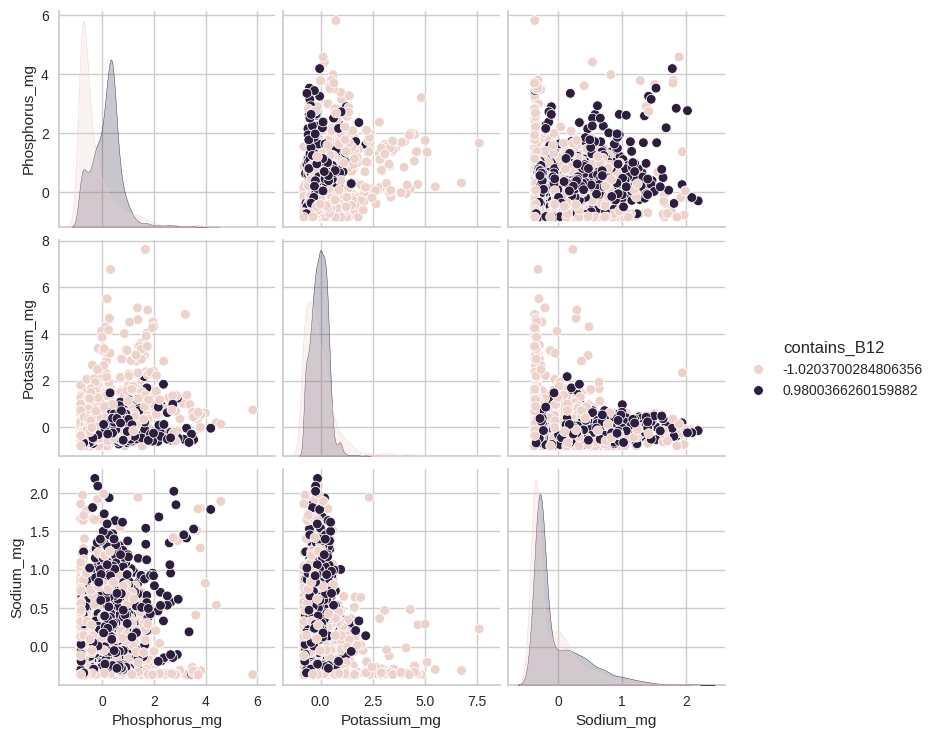

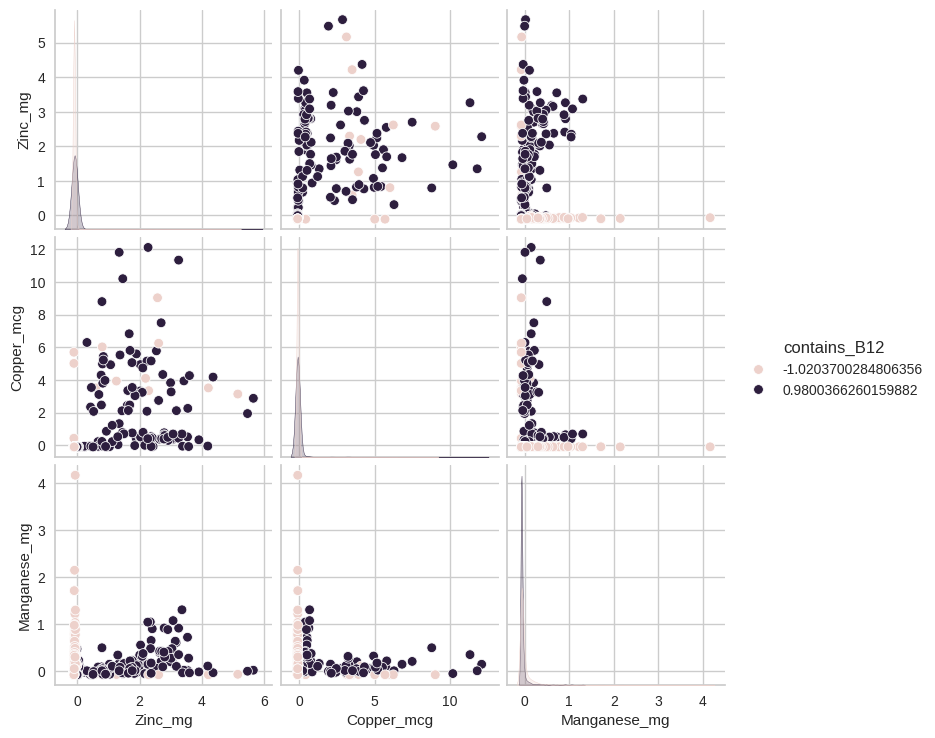

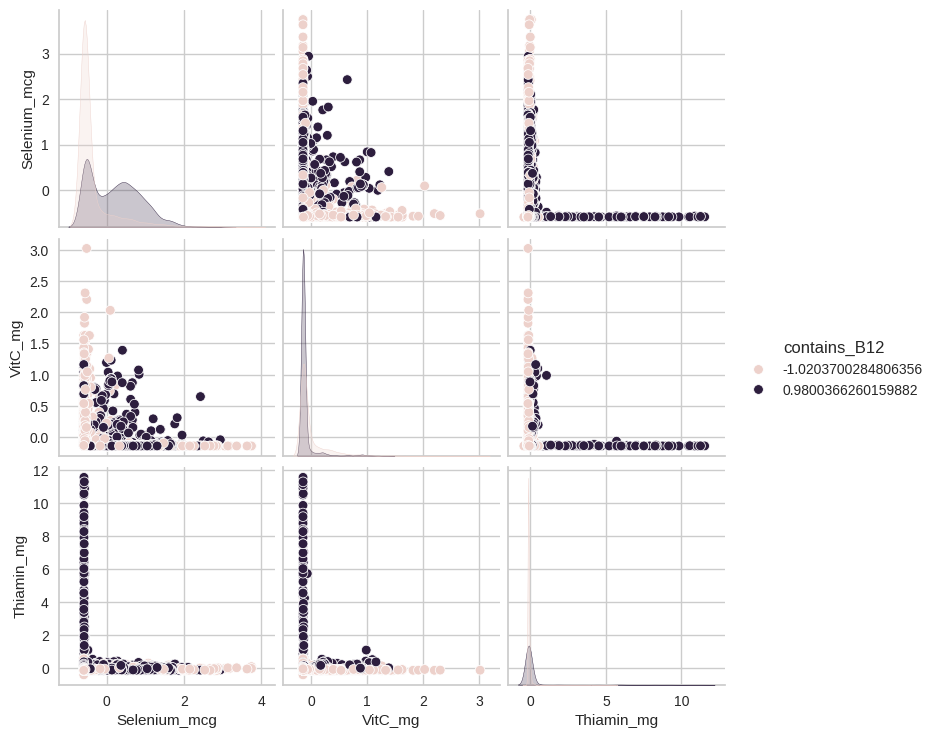

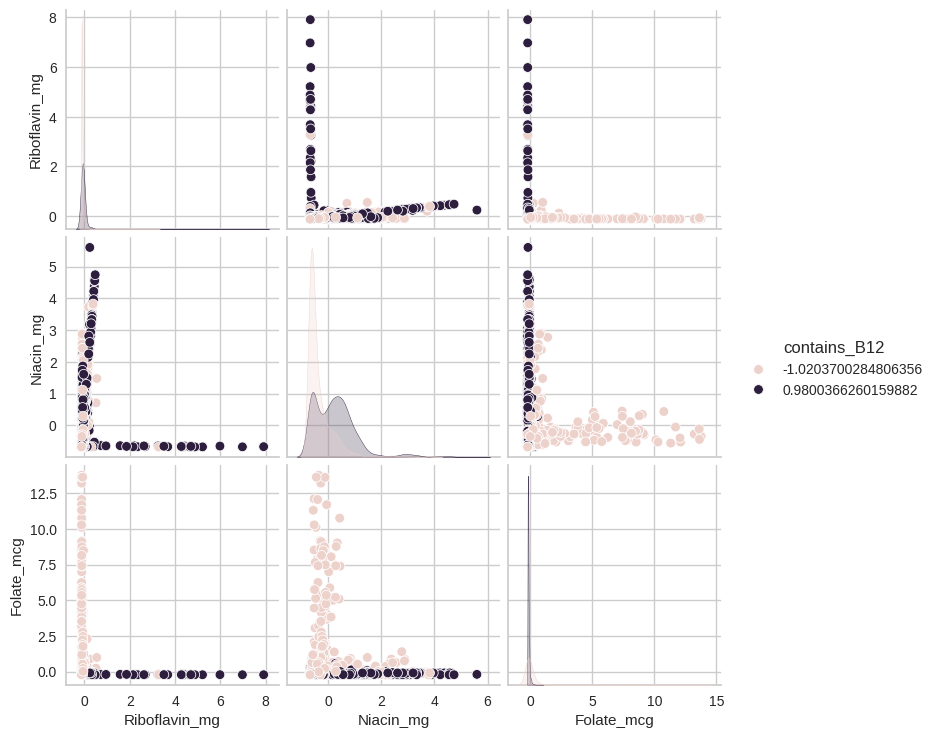

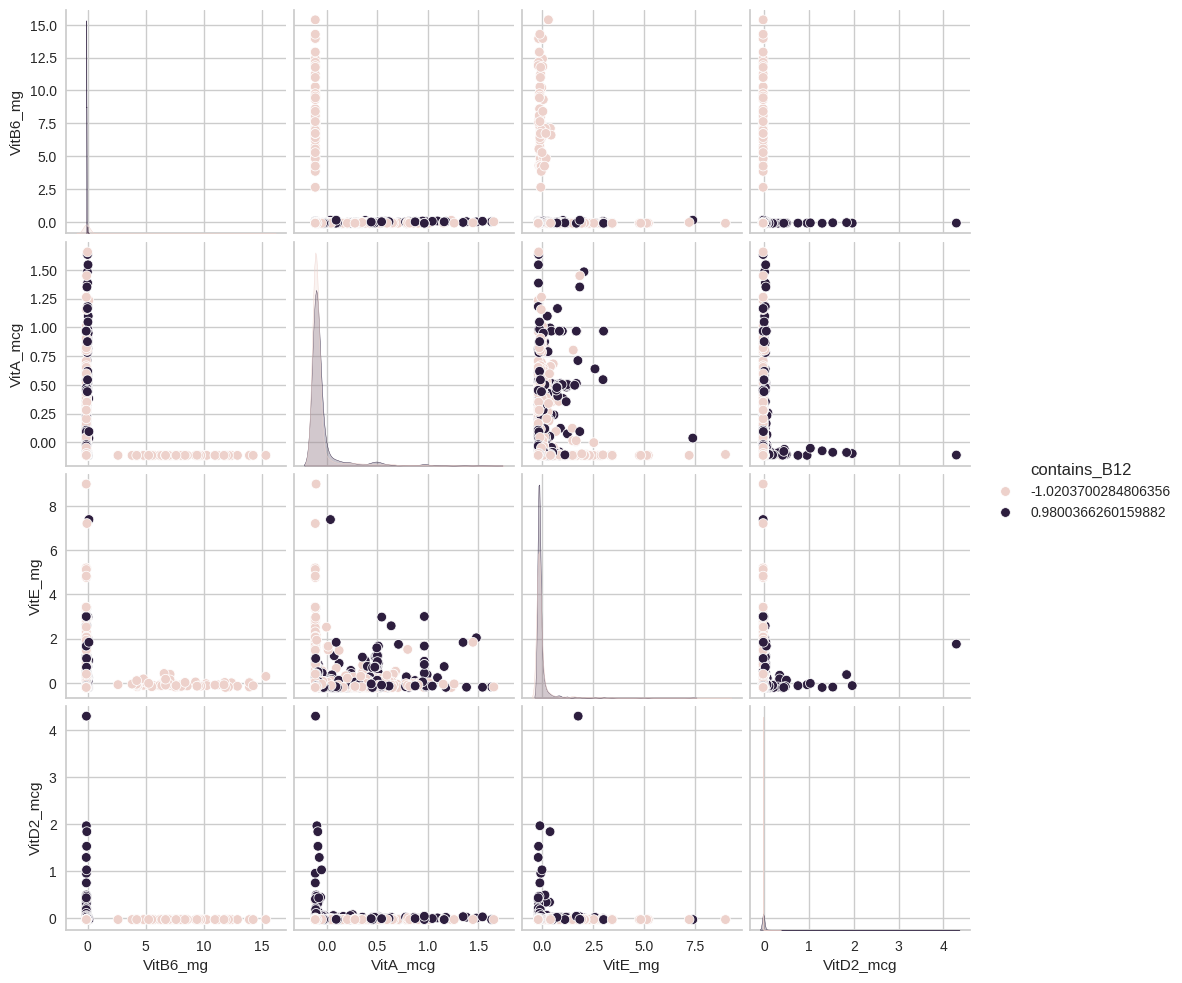

In [ ]:
sns.scatterplot(x=data['Carb_g'], y=data['Sugar_g'])
plt.title('Carbs vs Sugars')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Sugars (g)')
plt.xlim(0, 100) 
plt.ylim(0, 100)
plt.show()
plot_graphs(train_data)

Obviouse correlation of sugers and carbs is so evident that the oulaiers can be catched eave by just looking on the graph.

array([[<AxesSubplot: xlabel='Sugar_g', ylabel='Sugar_g'>,
        <AxesSubplot: xlabel='Carb_g', ylabel='Sugar_g'>],
       [<AxesSubplot: xlabel='Sugar_g', ylabel='Carb_g'>,
        <AxesSubplot: xlabel='Carb_g', ylabel='Carb_g'>]], dtype=object)

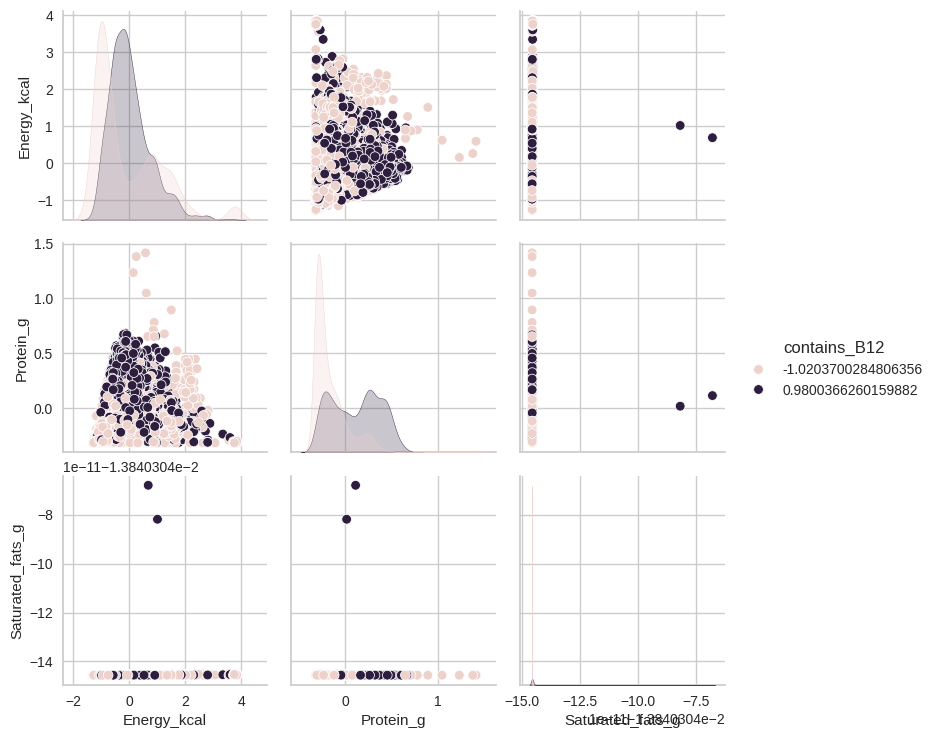

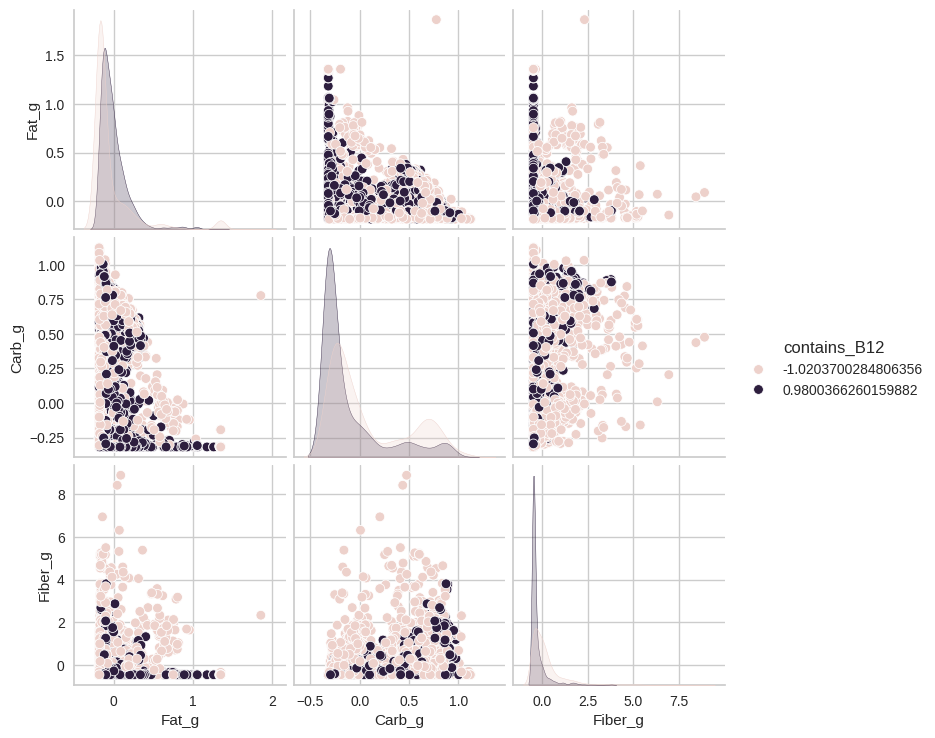

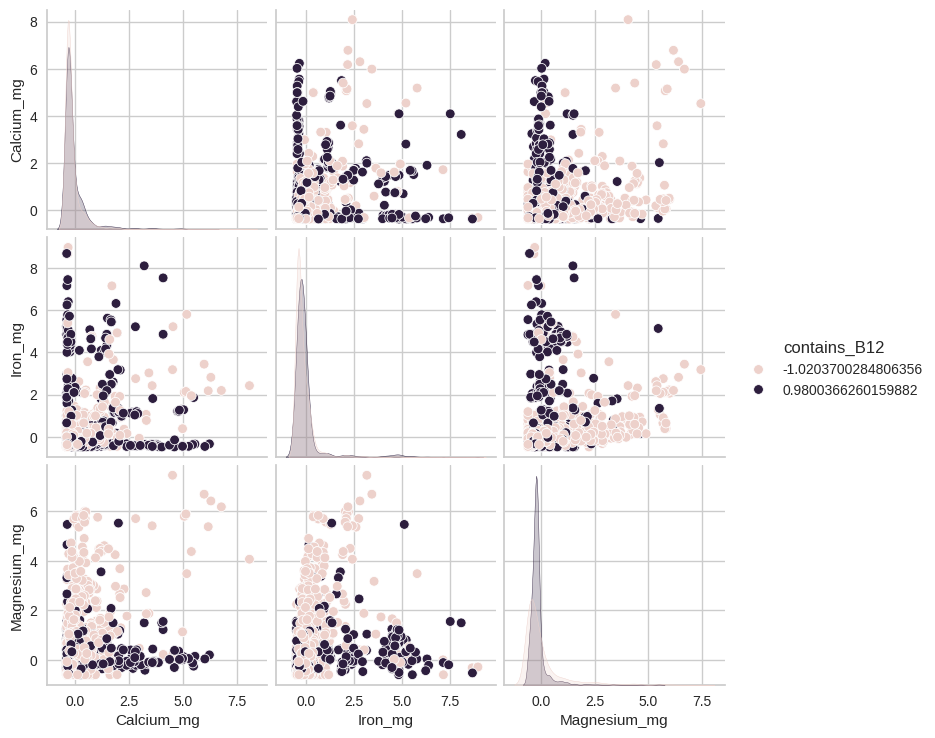

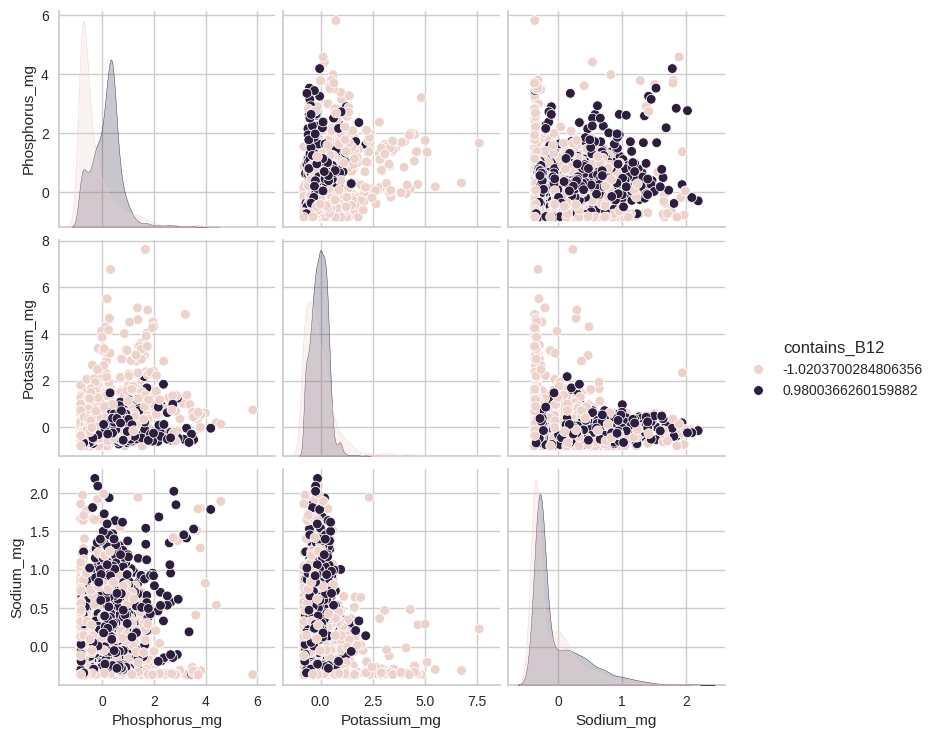

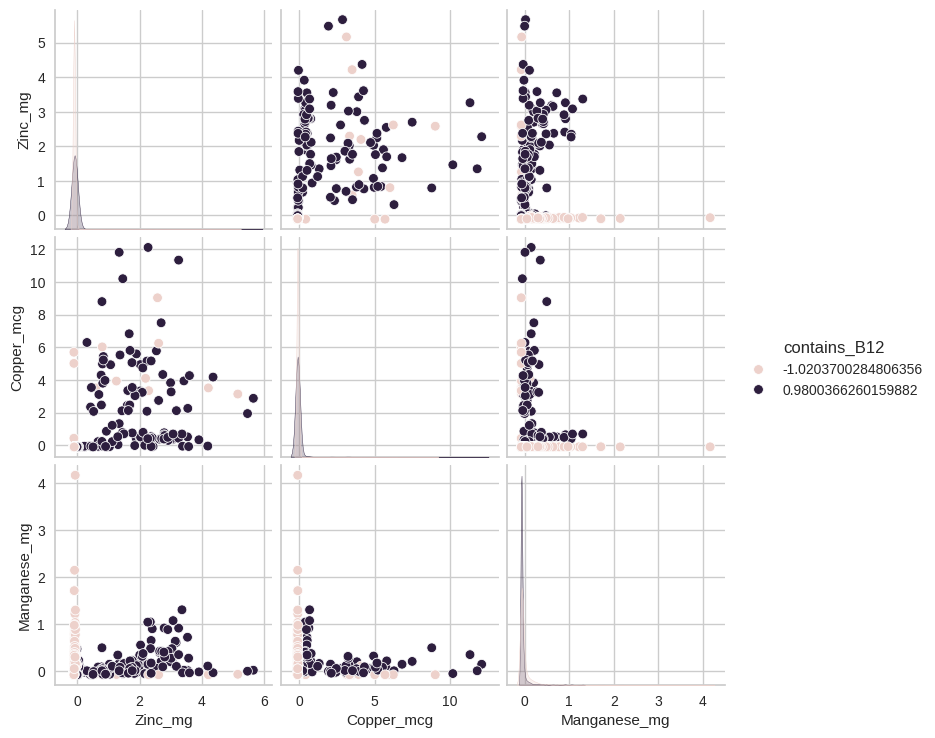

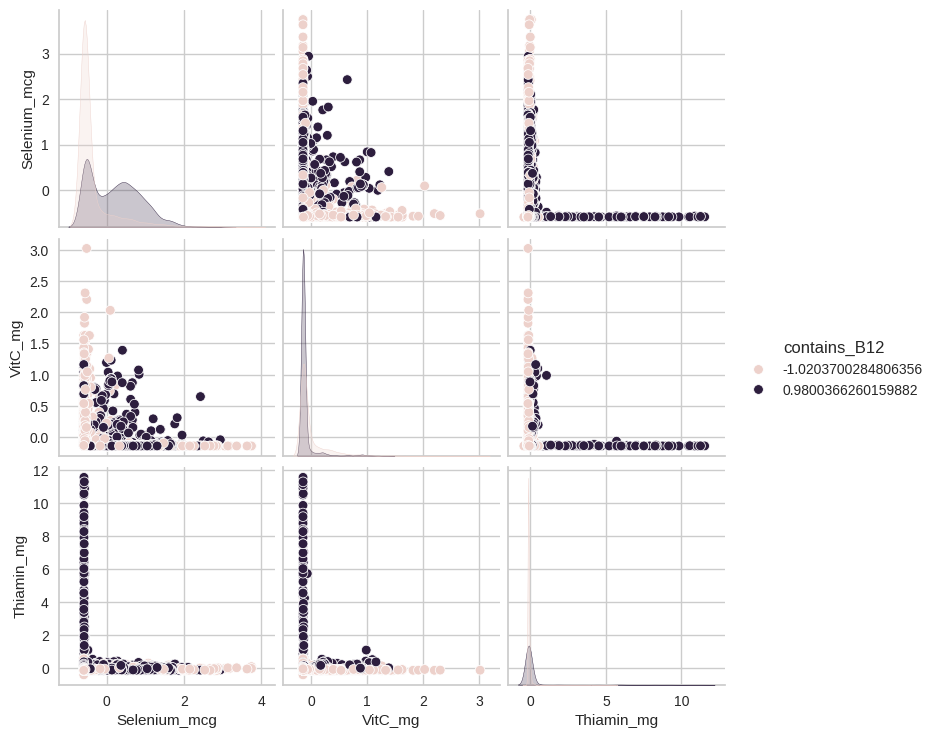

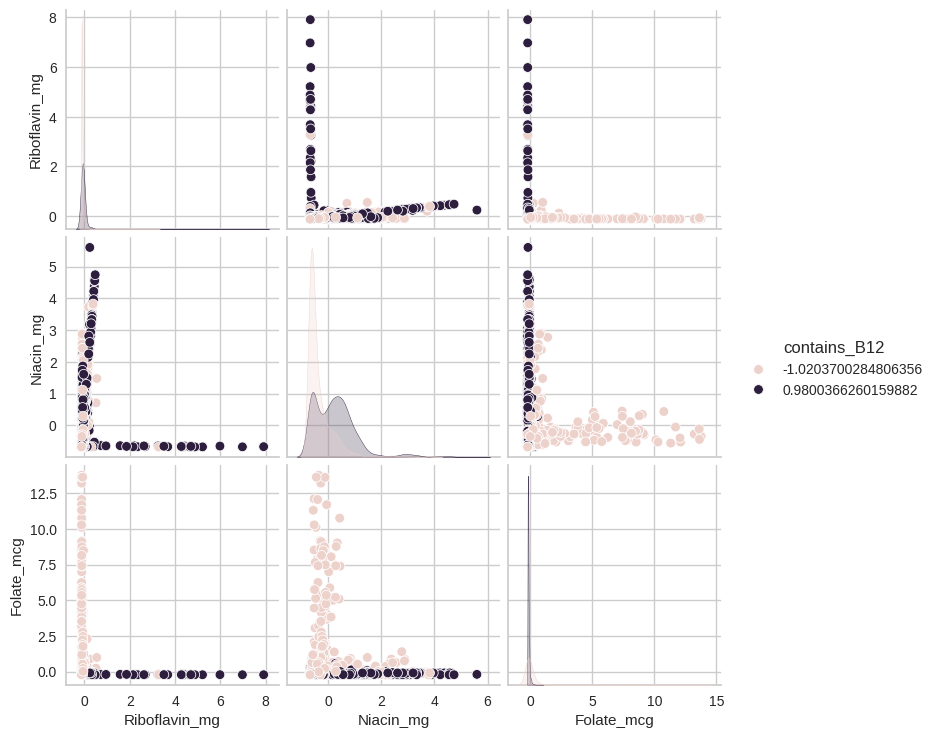

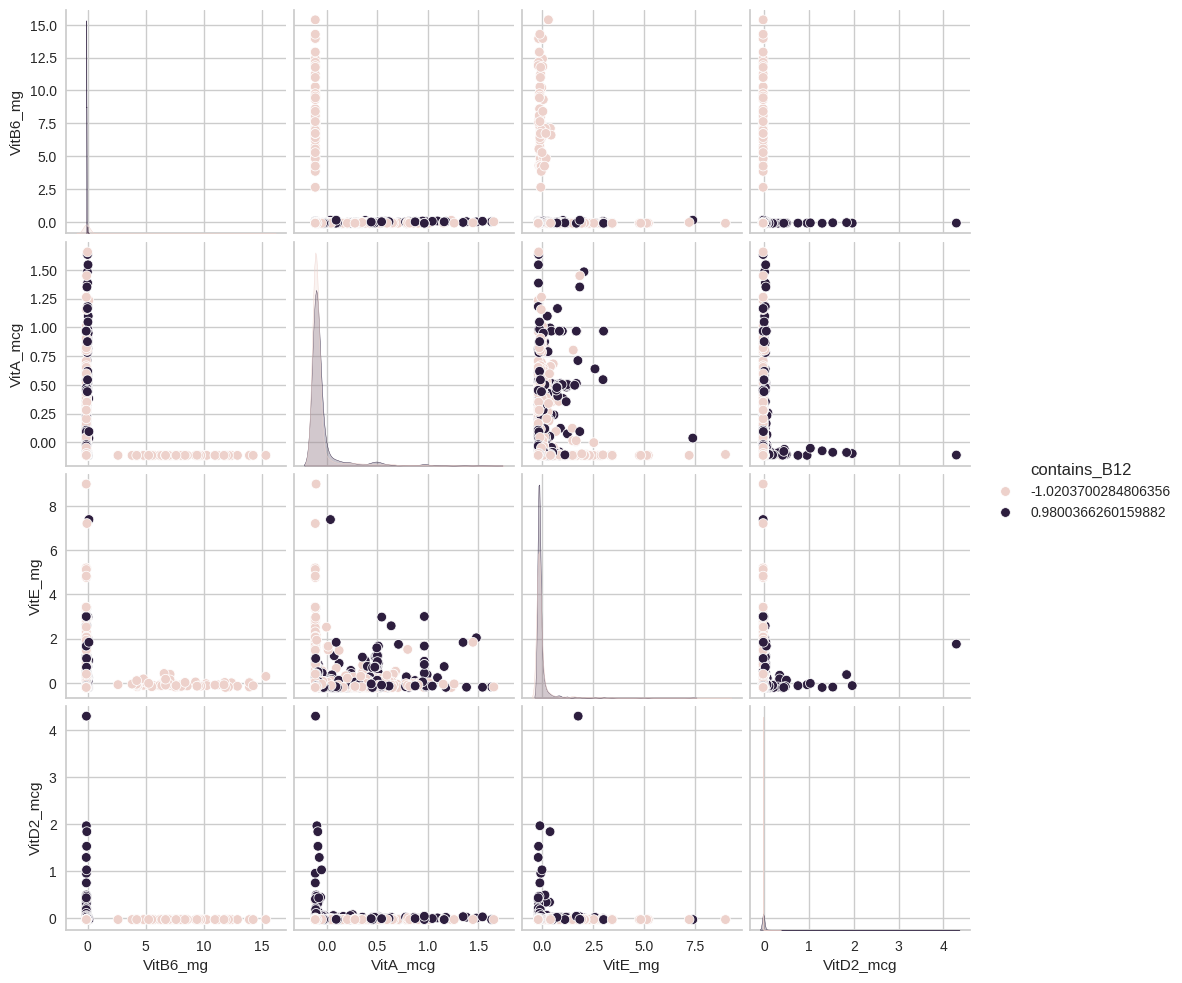

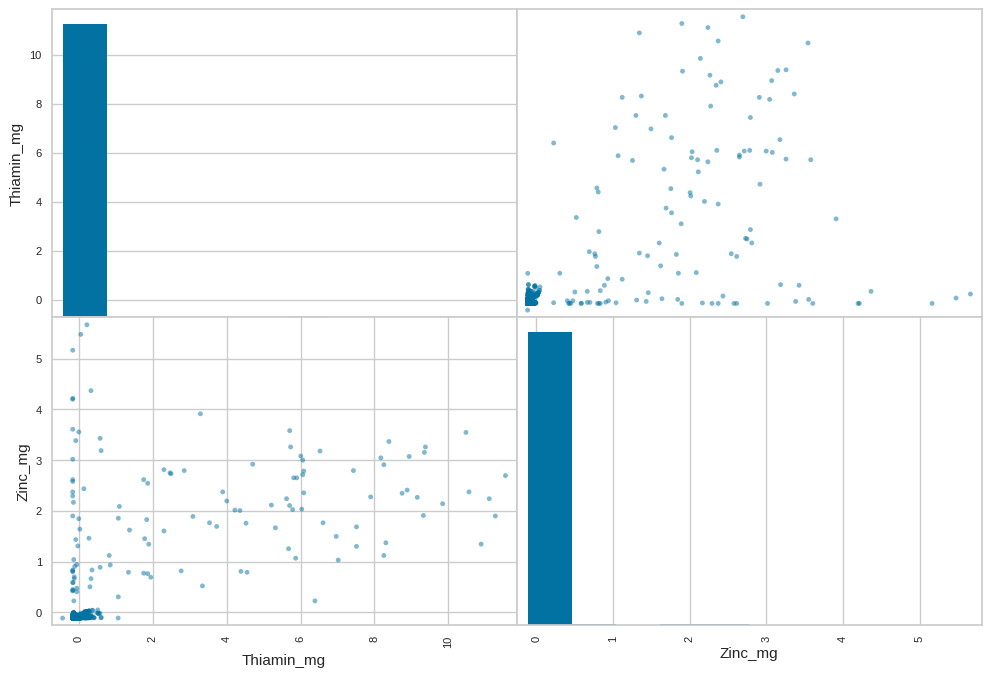

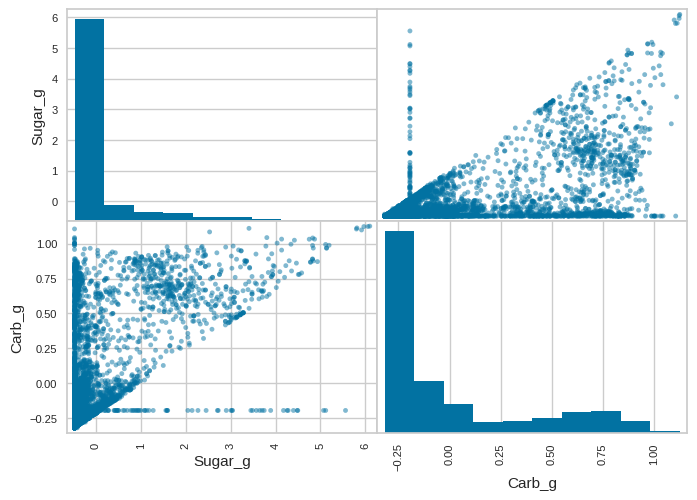

In [38]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")
plot_graphs(train_data)
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[["Thiamin_mg", "Zinc_mg"]], figsize=(12, 8))
scatter_matrix(train_data[["Sugar_g", "Carb_g"]])

Protein_g  Saturated_fats_g     Fat_g    Carb_g   Fiber_g  \
Protein_g          1.000000          0.008055  0.056912 -0.313537 -0.115060   
Saturated_fats_g   0.008055          1.000000  0.051181 -0.015976 -0.013432   
Fat_g              0.056912          0.051181  1.000000 -0.028271 -0.021158   
Carb_g            -0.313537         -0.015976 -0.028271  1.000000  0.479987   
Fiber_g           -0.115060         -0.013432 -0.021158  0.479987  1.000000   
Calcium_mg         0.035993         -0.005678  0.057746  0.205095  0.290109   
Iron_mg            0.089988         -0.006896 -0.017798  0.346194  0.322616   
Sodium_mg         -0.020528         -0.008588  0.063888  0.252456  0.033948   
Zinc_mg            0.077347         -0.003030 -0.016205 -0.066168 -0.053004   
Manganese_mg       0.035033         -0.007073  0.041981  0.218363  0.462336   
Selenium_mcg       0.664711         -0.004156 -0.017308 -0.171061 -0.066014   
VitC_mg           -0.263667         -0.011004 -0.156934  0.046064  0.095693   
Riboflavin_mg      0.004723         -0.004340 -0.033266  0.051275  0.019946   
Niacin_mg          0.534200         -0.000437  0.014354  0.155021  0.079851   
Folate_mcg         0.106313         -0.006204 -0.067963 -0.049825  0.065283   
VitB12_mcg         0.428027         -0.007038 -0.006896 -0.116072 -0.119107   
VitA_mcg          -0.137945         -0.001595  0.036554  0.133666  0.062013   
VitE_mg           -0.033777          0.001249  0.388329  0.076102  0.140193   
VitD2_mcg          0.007288         -0.000924  0.001008 -0.014475 -0.021784   
contains_B12       0.522633          0.022559  0.065884 -0.250074 -0.316871   

                  Calcium_mg   Iron_mg  Sodium_mg   Zinc_mg  Manganese_mg  \
Protein_g           0.035993  0.089988  -0.020528  0.077347      0.035033   
Saturated_fats_g   -0.005678 -0.006896  -0.008588 -0.003030     -0.007073   
Fat_g               0.057746 -0.017798   0.063888 -0.016205      0.041981   
Carb_g              0.205095  0.346194   0.252456 -0.066168      0.218363   
Fiber_g             0.290109  0.322616   0.033948 -0.053004      0.462336   
Calcium_mg          1.000000  0.305492   0.200285 -0.053592      0.204599   
Iron_mg             0.305492  1.000000   0.096005  0.065347      0.168196   
Sodium_mg           0.200285  0.096005   1.000000 -0.032984     -0.040109   
Zinc_mg            -0.053592  0.065347  -0.032984  1.000000      0.264083   
Manganese_mg        0.204599  0.168196  -0.040109  0.264083      1.000000   
Selenium_mcg        0.037262  0.089078   0.017196 -0.076557      0.010738   
VitC_mg             0.132674  0.130010  -0.108280 -0.052418      0.003824   
Riboflavin_mg       0.047430  0.196169   0.011138  0.285137      0.025051   
Niacin_mg           0.089435  0.501784   0.119182 -0.075538      0.001812   
Folate_mcg          0.008750 -0.005354  -0.069488 -0.028842      0.034714   
VitB12_mcg          0.024793  0.285302  -0.019702  0.007808     -0.102061   
VitA_mcg            0.281763  0.242658   0.073604 -0.020812      0.017531   
VitE_mg             0.113453  0.049752   0.023390  0.040481      0.131135   
VitD2_mcg          -0.004840  0.087276  -0.007367  0.244952      0.037974   
contains_B12        0.069808  0.079005   0.117934  0.135479     -0.142174   

                  Selenium_mcg   VitC_mg  Riboflavin_mg  Niacin_mg  \
Protein_g             0.664711 -0.263667       0.004723   0.534200   
Saturated_fats_g     -0.004156 -0.011004      -0.004340  -0.000437   
Fat_g                -0.017308 -0.156934      -0.033266   0.014354   
Carb_g               -0.171061  0.046064       0.051275   0.155021   
Fiber_g              -0.066014  0.095693       0.019946   0.079851   
Calcium_mg            0.037262  0.132674       0.047430   0.089435   
Iron_mg               0.089078  0.130010       0.196169   0.501784   
Sodium_mg             0.017196 -0.108280       0.011138   0.119182   
Zinc_mg              -0.076557 -0.052418       0.285137  -0.075538   
Manganese_mg          0.010738  0.003824

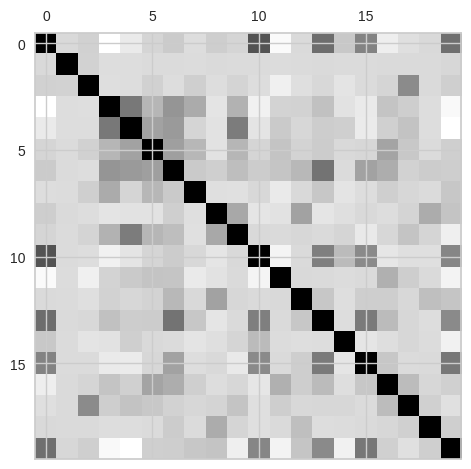

In [85]:
plt.matshow(train_data.corr())
train_data.corr()

## Preprocessing 2

Removing highly correlated features.

In [ ]:
train_data.pop("Energy_kcal") # Fat
train_data.pop("VitB6_mg") #
train_data.pop("Sugar_g") #
train_data.pop("Copper_mcg") #
train_data.pop("Potassium_mg") #
train_data.pop("Thiamin_mg") # 68 % zinek
train_data.pop("Magnesium_mg") # 64 % Fiber_g
train_data.pop("Phosphorus_mg") # 62 % protein
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Protein_g         5253 non-null   float64
 1   Saturated_fats_g  5253 non-null   float64
 2   Fat_g             5253 non-null   float64
 3   Carb_g            5253 non-null   float64
 4   Fiber_g           5253 non-null   float64
 5   Calcium_mg        5253 non-null   float64
 6   Iron_mg           5253 non-null   float64
 7   Sodium_mg         5253 non-null   float64
 8   Zinc_mg           5253 non-null   float64
 9   Manganese_mg      5253 non-null   float64
 10  Selenium_mcg      5253 non-null   float64
 11  VitC_mg           5253 non-null   float64
 12  Riboflavin_mg     5253 non-null   float64
 13  Niacin_mg         5253 non-null   float64
 14  Folate_mcg        5253 non-null   float64
 15  VitB12_mcg        5253 non-null   float64
 16  VitA_mcg          5253 non-null   float64


Find the optimal number of cluster for K-means and Alglomerative clustering.

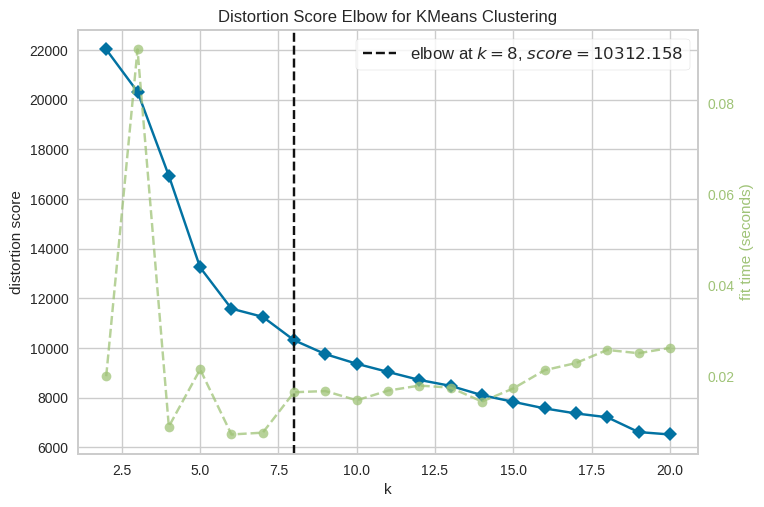

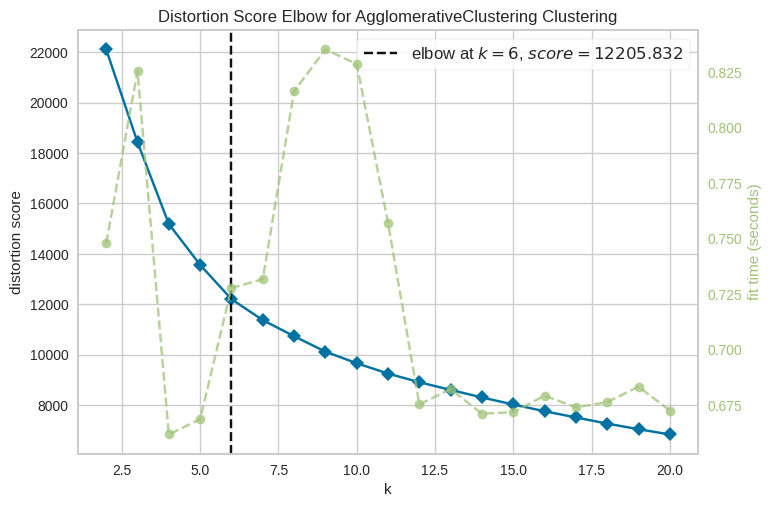

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
## elbow find best k for k means
from yellowbrick.cluster import  KElbowVisualizer

km_try = KMeans(random_state=42)
elbow = KElbowVisualizer(km_try, k=(2,21))
elbow.fit(train_data)
elbow.show()

ag_try = AgglomerativeClustering()
elbow = KElbowVisualizer(ag_try, k=(2,21))
elbow.fit(train_data)
elbow.show()


In [31]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
km = KMeans(n_clusters=8, random_state=42)
kmeans_labels = km.fit_predict(train_data)
train_data["cluster"] = km.fit_predict(train_features)

km_silhouette = silhouette_score(train_data, kmeans_labels)
km_davis = davies_bouldin_score(train_data, kmeans_labels)
km_clainski = calinski_harabasz_score(train_data, kmeans_labels)
print("KMeans silhouette: ", round(km_silhouette, 3))
print("KMeans Calinski Harabasz: ", round(km_clainski, 3))
print("KMeans Davis bouldin: ", round(km_davis, 3))

KMeans silhouette:  0.336
KMeans Calinski Harabasz:  1351.439
KMeans Davis bouldin:  1.276


In [102]:
km = KMeans(n_clusters=8, random_state=42)
kmeans_labels = km.fit_predict(train_features)
train_data["cluster"] = km.fit_predict(train_features)
print(train_data.head())
for label in train_data['cluster'].unique():
    cluster_df = train_data[train_data['cluster'] == label]
    cluster_df.to_csv(f"cluster_{label}.csv", index=False)


                                             Descrip  Energy_kcal  Protein_g  \
0     beef chuck blade rst lnfat 18"fat sel ckd brsd      318.000      27.33   
1                            colocasia  stem  black        23.900       0.76   
2  campbell's chunky microwavable bwls chck dmpli...       78.000       3.27   
3  campbell's healthy request crm of mushroom sou...       55.000       1.29   
4                                               rohu      102.292      19.71   

   Saturated_fats_g  Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  Iron_mg  \
0             8.890  22.35    0.00     0.00     0.00       13.00     3.20   
1             0.103   0.34    3.83     3.01     0.53       29.46     0.77   
2             0.816   3.67    7.35     1.20     0.82        8.00     0.00   
3             0.330   1.70    8.60     1.00     1.79       71.00     0.30   
4             2.047   2.39    0.00     0.00     0.00       39.37     1.04   

   ... Riboflavin_mg  Niacin_mg  VitB6_mg  Folate_mcg  V

In [78]:
aglo = AgglomerativeClustering(n_clusters=6)
aglog_labels = aglo.fit_predict(train_data)
aglo_silhouette = silhouette_score(train_data, aglog_labels)
aglo_davis = davies_bouldin_score(train_data, aglog_labels)
aglo_clainski = calinski_harabasz_score(train_data, aglog_labels)
print("Aglomerative silhouette: ", round(aglo_silhouette, 3))
print("Aglomerative Calinski Harabasz: ", round(aglo_clainski, 3))
print("Aglomerative Davis bouldin: ", round(aglo_davis, 3))

Aglomerative silhouette:  0.349
Aglomerative Calinski Harabasz:  1436.279
Aglomerative Davis bouldin:  1.272


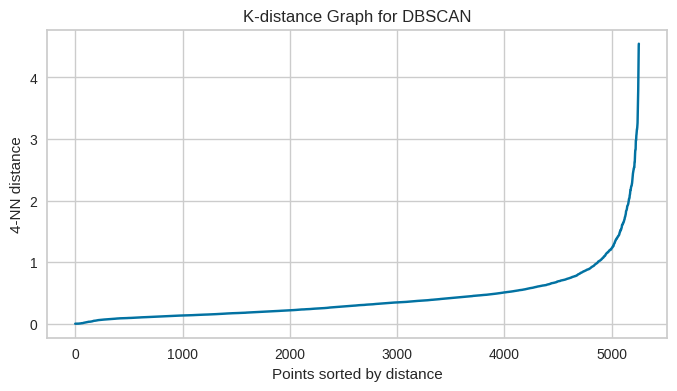

In [79]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(train_data)
distances, inidces = nbrs.kneighbors(train_data)
distances = np.sort(distances[:,3])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.ylabel(f"{4}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("K-distance Graph for DBSCAN")
plt.grid(True)
plt.show()

In [84]:
dbscan = DBSCAN(eps=1.05)
dbscan_labels = dbscan.fit_predict(train_data)
dbscan = DBSCAN(eps=1.05, min_samples=21)
dbscan_labels = dbscan.fit_predict(train_data)
dbscan_silhouette = silhouette_score(train_data, dbscan_labels)
dbscan_davis = davies_bouldin_score(train_data, dbscan_labels)
dbscan_calinski = calinski_harabasz_score(train_data, dbscan_labels)
print("DBSCAN silhouette: ", round(dbscan_silhouette, 3))
print("DBSCAN Calinski Harabasz: ", round(dbscan_calinski, 3))
print("DBSCAN Davis bouldin: ", round(dbscan_davis,3))

DBSCAN silhouette:  0.375
DBSCAN Calinski Harabasz:  1247.176
DBSCAN Davis bouldin:  1.994


In [36]:
# train_data[(train_data.Iron_mg < 10.0)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12 == False)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12) == False].Iron_mg.hist()